In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [2]:
users_df = pd.read_csv("data/users.csv")
users_df["inviter_id"] = users_df["inviter_id"].astype("Int64")
users_df


,user_id,username,joined_date,inviter_id
0,1,Brooke Castillo,01/01/2024,<NA>
1,2,Heather Graham,01/01/2024,<NA>
2,3,Holly Miller,01/01/2024,<NA>
3,4,Todd Chang,01/01/2024,<NA>
4,5,Dawn Salinas,01/01/2024,<NA>
...,...,...,...,...
4995,4996,Matthew Moore,15/01/2025,1774
4996,4997,Joseph Harris,15/01/2025,761
4997,4998,Kenneth Burke,15/01/2025,<NA>
4998,4999,Austin Vasquez,15/01/2025,<NA>


<Axes: title={'center': 'Distribution of Users By Referral and Non Referrals'}>

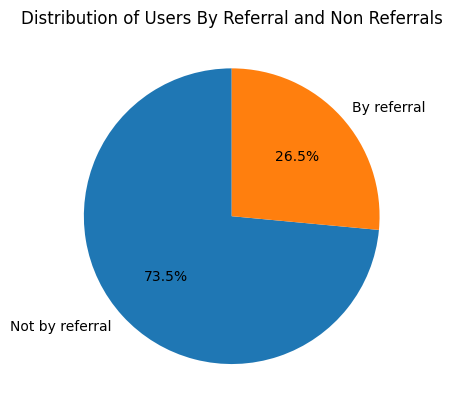

In [3]:
# users_df["n_of_referrals"]

# for user in inviter_id
first_tier = users_df.groupby("inviter_id").size()
users_df["referral_1st_tier"] = users_df["user_id"].map(first_tier).fillna(0).astype("Int64")

by_invite = users_df.groupby(users_df["inviter_id"].notnull()).size()


by_invite.plot.pie(
    labels=["Not by referral", "By referral"], 
    autopct='%1.1f%%', 
    startangle=90, 
    title="Distribution of Users By Referral and Non Referrals"
)

<Axes: title={'center': 'Distribution of Users Who Has Referred and Has Not Referred'}>

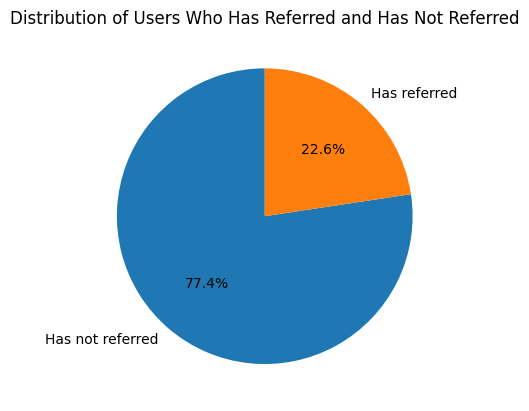

In [4]:
has_invited = users_df.groupby(users_df["referral_1st_tier"] > 0).size()

users_df

has_invited.plot.pie(
    labels=["Has not referred", "Has referred"], 
    autopct='%1.1f%%', 
    startangle=90, 
    title="Distribution of Users Who Has Referred and Has Not Referred"
)

In [5]:
def get_2nd_tier(user):
    second_tier = users_df[users_df["inviter_id"].isin(
        users_df[users_df["inviter_id"] == user]["user_id"])].shape[0]
    return second_tier

users_df["referral_2nd_tier"] = users_df["user_id"].apply(get_2nd_tier)

users_df
        

    #kalo inviter_id ada di kolom user_id, maka tier 1 user id itu nambah 1
    #cek 2nd tier: pertama liat dulu 1st tier dari yg user_idnya ada di inviter_id
    #cek yg inviter_id nya ada di first tier

,user_id,username,joined_date,inviter_id,referral_1st_tier,referral_2nd_tier
0,1,Brooke Castillo,01/01/2024,<NA>,0,0
1,2,Heather Graham,01/01/2024,<NA>,1,1
2,3,Holly Miller,01/01/2024,<NA>,0,0
3,4,Todd Chang,01/01/2024,<NA>,0,0
4,5,Dawn Salinas,01/01/2024,<NA>,1,0
...,...,...,...,...,...,...
4995,4996,Matthew Moore,15/01/2025,1774,0,0
4996,4997,Joseph Harris,15/01/2025,761,0,0
4997,4998,Kenneth Burke,15/01/2025,<NA>,0,0
4998,4999,Austin Vasquez,15/01/2025,<NA>,0,0


In [6]:
users_df["total_rewards"] = users_df["referral_1st_tier"]*5 + users_df["referral_2nd_tier"]*3
total_rewards_sum = users_df["total_rewards"].sum()
print(f"Total amount spent on referral rewards: {total_rewards_sum} USD")


Total amount spent on referral rewards: 7277 USD


In [15]:
# Calculate the total number of users where by_invite is True (inviter_id is not null)
total_by_invite = users_df["inviter_id"].notnull().sum()

# Calculate CAC (Customer Acquisition Cost)
CAC = total_rewards_sum / total_by_invite

# Print the result
print(f"CAC: {CAC}")


CAC: 5.496223564954683
